In [1]:
from osgeo import gdal
import os 
import earthpy
import rasterio as rio
import matplotlib.pyplot as plt

import numpy as np
import earthpy.spatial as es

In [2]:
def hdf_subdataset_extraction(hdf_file, dst_dir, subdataset):
    """unpack a single subdataset from a HDF5 container and write to GeoTiff"""
    # open the dataset
    hdf_ds = gdal.Open(hdf_file, gdal.GA_ReadOnly)
    band_ds = gdal.Open(hdf_ds.GetSubDatasets()[subdataset][0], gdal.GA_ReadOnly)

    # read into numpy array
    band_array = band_ds.ReadAsArray().astype(np.int16)

    # convert no_data values
    #band_array[band_array == -28672] = -32768

    # build output path
    band_path = os.path.join(dst_dir, os.path.basename(os.path.splitext(hdf_file)[0]) + "-sd" + str(subdataset+1) + ".tif")

    # write raster
    out_ds = gdal.GetDriverByName('GTiff').Create(band_path,
                                                  band_ds.RasterXSize,
                                                  band_ds.RasterYSize,
                                                  1,  #Number of bands
                                                  gdal.GDT_Int16,
                                                  ['COMPRESS=LZW', 'TILED=YES'])
    out_ds.SetGeoTransform(band_ds.GetGeoTransform())
    out_ds.SetProjection(band_ds.GetProjection())
    out_ds.GetRasterBand(1).WriteArray(band_array)
    #out_ds.GetRasterBand(1).SetNoDataValue(-32768)

    out_ds = None  #close dataset to write to disc


In [3]:
os.getcwd()


'/Users/shannonwhite/git/volcano-risk-analysis/notebooks'

In [4]:
os.chdir('/Users/shannonwhite/git/data/ASTER')

# Aster Data 
### Band 5 (NIR) Landsat = band 4 Aster
### Band 4 (red) Landsat = band 2 Aster
### Band 6 (SWIR2) Landsat = band 6-7 Aster 

In [5]:
file=gdal.Open('post_L1B_20170316205951.hdf')
## Use to get see bands / indexes 
file.GetSubDatasets()

[('HDF4_EOS:EOS_SWATH:"post_L1B_20170316205951.hdf":VNIR_Swath:ImageData1',
  '[4200x4980] ImageData1 VNIR_Swath (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"post_L1B_20170316205951.hdf":VNIR_Swath:ImageData2',
  '[4200x4980] ImageData2 VNIR_Swath (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"post_L1B_20170316205951.hdf":VNIR_Swath:ImageData3N',
  '[4200x4980] ImageData3N VNIR_Swath (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"post_L1B_20170316205951.hdf":VNIR_Swath:ImageData3B',
  '[4600x4980] ImageData3B VNIR_Swath (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"post_L1B_20170316205951.hdf":SWIR_Swath:ImageData4',
  '[2100x2490] ImageData4 SWIR_Swath (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"post_L1B_20170316205951.hdf":SWIR_Swath:ImageData5',
  '[2100x2490] ImageData5 SWIR_Swath (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"post_L1B_20170316205951.hdf":SWIR_Swath:ImageData6',
  '[2100x2490] ImageData6 SWIR_Swath (8-bit unsigned integer)'),
 ('HDF4_E

In [6]:
# Run function with the path and name of HDF file, output directory, and index of the layer
# i.e. index 0 is green and index 1 is red
hdf_subdataset_extraction("post_L1B_20170316205951.hdf", "/Users/shannonwhite/git/data/ASTER/outputA", 0)
hdf_subdataset_extraction("post_L1B_20170316205951.hdf", "/Users/shannonwhite/git/data/ASTER/outputA", 1)

/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


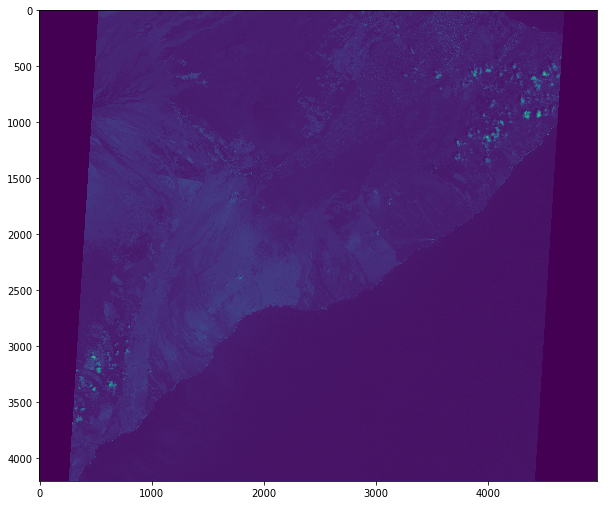

In [7]:
with rio.open("/Users/shannonwhite/git/data/ASTER/outputA/post_L1B_20170316205951-sd2.tif") as src_red:
    red = src_red.read()
        
fig,ax1=plt.subplots(figsize=(10,10))

im=ax1.imshow(red[0])

plt.show()

In [8]:
file=gdal.Open('AST_L1T_00311052018210640_20181106100852_32599.hdf')
#file.GetSubDatasets()

In [9]:
file=gdal.Open('AST_L1T_00311052018210631_20181106100922_1982.hdf')
#file.GetSubDatasets()

In [10]:
hdf_subdataset_extraction("AST_L1T_00311052018210631_20181106100922_1982.hdf", "/Users/shannonwhite/git/data/ASTER/outputA", 0) 
hdf_subdataset_extraction("AST_L1T_00311052018210631_20181106100922_1982.hdf", "/Users/shannonwhite/git/data/ASTER/outputA", 10)

In [11]:
with rio.open("/Users/shannonwhite/git/data/ASTER/outputA/AST_L1T_00311052018210631_20181106100922_1982-sd1.tif") as red_src2:
    redband = red_src2.read()

/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [12]:
np.histogram(redband)

(array([11598186, 11059164,  1890144,   781138,   607651,   459776,
          385568,   289479,   241817,   758900]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

In [13]:
with rio.open("/Users/shannonwhite/git/data/ASTER/outputA/AST_L1T_00311052018210631_20181106100922_1982-sd11.tif") as src2:
    band = src2.read()
        
#fig,ax1=plt.subplots(figsize=(10,10))

#im=ax1.imshow(band[0])

#plt.show()

/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [14]:
# Both red bands (index 0 and index 10) match 
np.histogram(band)

(array([11598186, 11059164,  1890144,   781138,   607651,   459776,
          385568,   289479,   241817,   758900]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1037a2198>)

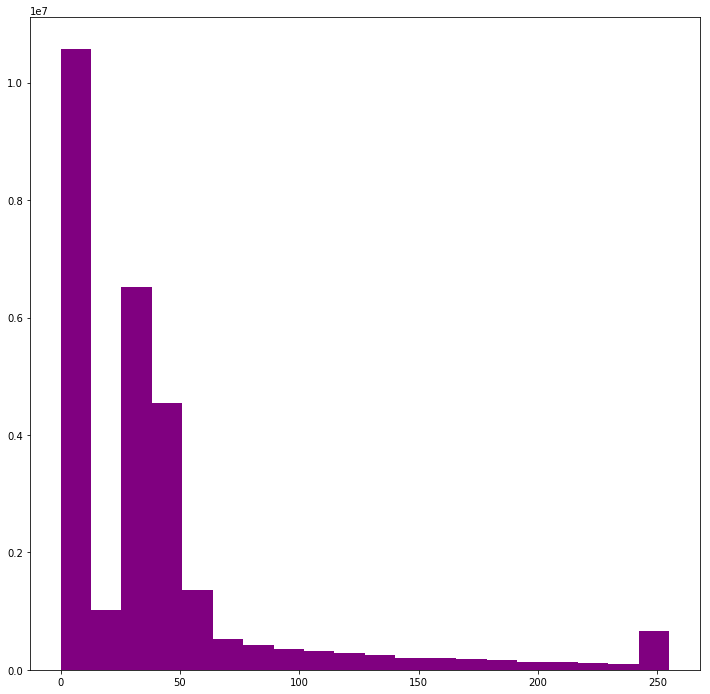

In [15]:
es.hist(band[0])

In [16]:
file=gdal.Open('AST_L1T_00311052018210640_20181106100852_32599.hdf')
#file.GetSubDatasets()

In [17]:
hdf_subdataset_extraction("AST_L1T_00311052018210640_20181106100852_32599.hdf", "/Users/shannonwhite/git/data/ASTER/outputA", 0)

/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


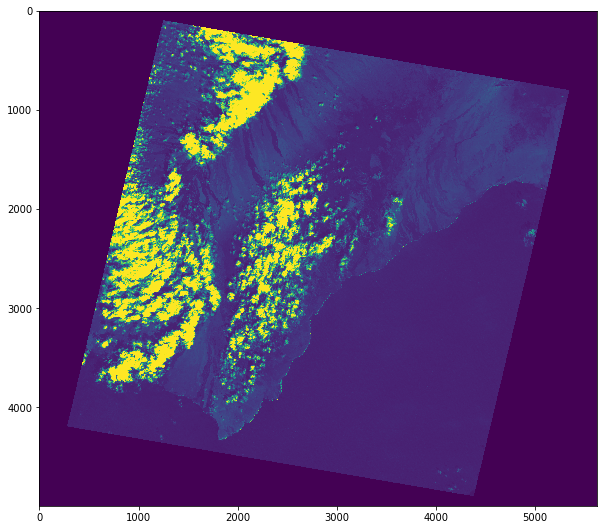

In [18]:
with rio.open("/Users/shannonwhite/git/data/ASTER/outputA/AST_L1T_00311052018210640_20181106100852_32599-sd1.tif") as src3_red:
    red3 = src3_red.read()
        
fig,ax1=plt.subplots(figsize=(10,10))

im=ax1.imshow(red3[0])

plt.show()

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1037d1cf8>)

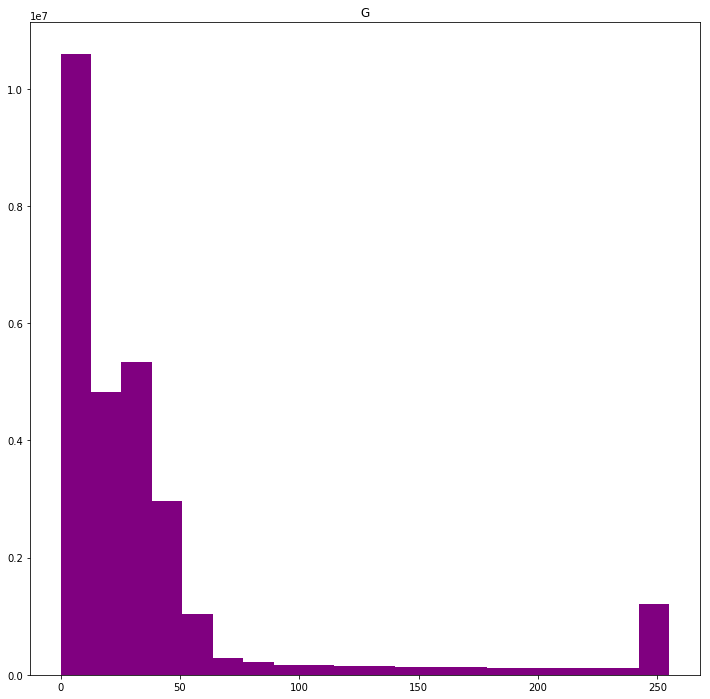

In [19]:
es.hist(red3[0],
        title="Green")

In [20]:
os.getcwd()

'/Users/shannonwhite/git/data/ASTER'

In [21]:
os.chdir('/Users/shannonwhite/git/data/MODIS')

# Modis Data 
### red band = band 01
### nir band = band 05

In [22]:
# Sample file 
fileM=gdal.Open('MOD09GA.A2019035.h03v07.006.2019072162419.hdf')
fileM.GetSubDatasets()

[('HDF4_EOS:EOS_GRID:"MOD09GA.A2019035.h03v07.006.2019072162419.hdf":MODIS_Grid_1km_2D:num_observations_1km',
  '[1200x1200] num_observations_1km MODIS_Grid_1km_2D (8-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"MOD09GA.A2019035.h03v07.006.2019072162419.hdf":MODIS_Grid_1km_2D:state_1km_1',
  '[1200x1200] state_1km_1 MODIS_Grid_1km_2D (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"MOD09GA.A2019035.h03v07.006.2019072162419.hdf":MODIS_Grid_1km_2D:SensorZenith_1',
  '[1200x1200] SensorZenith_1 MODIS_Grid_1km_2D (16-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"MOD09GA.A2019035.h03v07.006.2019072162419.hdf":MODIS_Grid_1km_2D:SensorAzimuth_1',
  '[1200x1200] SensorAzimuth_1 MODIS_Grid_1km_2D (16-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"MOD09GA.A2019035.h03v07.006.2019072162419.hdf":MODIS_Grid_1km_2D:Range_1',
  '[1200x1200] Range_1 MODIS_Grid_1km_2D (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"MOD09GA.A2019035.h03v07.006.2019072162419.hdf":MODIS_Grid_1km_2D:SolarZenith_1',
  '[1200x1200] SolarZenith

In [23]:
hdf_subdataset_extraction("MOD09GA.A2019035.h03v07.006.2019072162419.hdf", "/Users/shannonwhite/git/data/MODIS/outputM", 11)

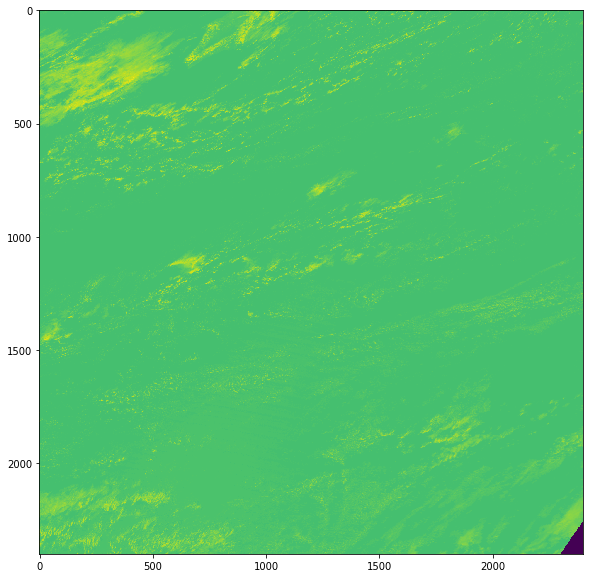

In [24]:
with rio.open("/Users/shannonwhite/git/data/MODIS/outputM/MOD09GA.A2019035.h03v07.006.2019072162419-sd12.tif") as src4_red:
    band1 = src4_red.read()
        
fig,ax1=plt.subplots(figsize=(10,10))

im=ax1.imshow(band1[0])

plt.show()

In [25]:
hdf_subdataset_extraction("MOD09GA.A2019035.h03v07.006.2019072162419.hdf", "/Users/shannonwhite/git/data/MODIS/outputM", 15)

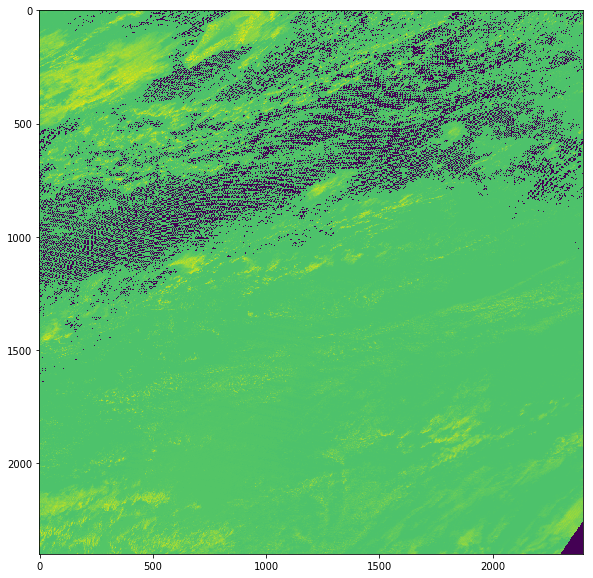

In [26]:
with rio.open("/Users/shannonwhite/git/data/MODIS/outputM/MOD09GA.A2019035.h03v07.006.2019072162419-sd16.tif") as src5:
    nir1 = src5.read()
        
fig,ax1=plt.subplots(figsize=(10,10))

im=ax1.imshow(nir1[0])

plt.show()